# Rainfall Prediction - Weather Forecasting

# Problem Statement:

Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. 

# Here, predict two things:

1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.



# Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df_n=pd.read_csv('weatherAUS.csv')

In [4]:
df_n

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
df_n.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Exploratory Data Analysis

In [6]:
df_n.shape

(8425, 23)

In [7]:
df_n.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [8]:
df_n.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [9]:
df_n.sample()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2362,2014-06-11,Penrith,8.1,19.2,0.4,NaN,NaN,NW,11.0,NaN,...,83.0,48.0,NaN,NaN,NaN,NaN,10.7,18.8,No,No


In [10]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [11]:
df=df_n.drop(['Date','Location','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm',
           'WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Cloud9am','Temp9am'
          ,'RainToday'],axis=1)

In [12]:
df

,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm,RainTomorrow
0,13.4,22.9,NaN,NaN,22.0,NaN,21.8,No
1,7.4,25.1,NaN,NaN,25.0,NaN,24.3,No
2,12.9,25.7,NaN,NaN,30.0,2.0,23.2,No
3,9.2,28.0,NaN,NaN,16.0,NaN,26.5,No
4,17.5,32.3,NaN,NaN,33.0,8.0,29.7,No
...,...,...,...,...,...,...,...,...
8420,2.8,23.4,NaN,NaN,24.0,NaN,22.4,No
8421,3.6,25.3,NaN,NaN,21.0,NaN,24.5,No
8422,5.4,26.9,NaN,NaN,24.0,NaN,26.1,No
8423,7.8,27.0,NaN,NaN,24.0,2.0,26.0,No


In [13]:
df.describe()

,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm
count,8350.000000,8365.000000,4913.000000,4431.000000,8323.000000,5970.000000,8329.000000
mean,13.193305,23.859976,5.389395,7.632205,51.249790,4.503183,22.442934
std,5.403596,6.136408,5.044484,3.896235,18.423774,2.731659,5.980020
min,-2.000000,8.200000,0.000000,0.000000,6.000000,0.000000,7.300000
25%,9.200000,19.300000,2.600000,4.750000,39.000000,2.000000,18.000000
50%,13.300000,23.300000,4.600000,8.700000,51.000000,5.000000,21.900000
75%,17.400000,28.000000,7.000000,10.700000,63.000000,7.000000,26.400000
max,28.500000,45.500000,145.000000,13.900000,99.000000,8.000000,44.100000


In [14]:
df['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

Checking Null Values

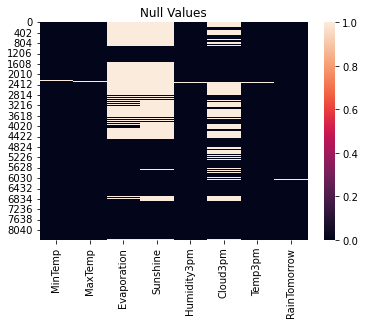

In [15]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [16]:
df.isnull().sum().sum()

10533

Therefore There are null values in the dataset.We shall remove the null values using the following 
techniques

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum().sum()

0

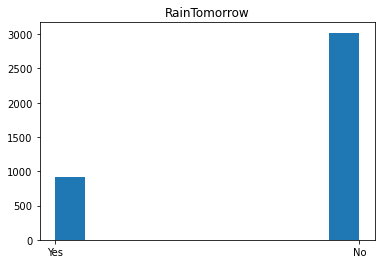

In [19]:
df['RainTomorrow'].hist(grid=False)
plt.title('RainTomorrow')
plt.show()

In [20]:
df['RainTomorrow'].value_counts()

No     3021
Yes     921
Name: RainTomorrow, dtype: int64

Label Encoder

In [21]:
from sklearn.preprocessing import  LabelEncoder

In [22]:
le=LabelEncoder()
df['RainTomorrow']=le.fit_transform(df['RainTomorrow'])

In [23]:
le.inverse_transform([1,0])

array(['Yes', 'No'], dtype=object)

In [24]:
df['RainTomorrow'].value_counts()

0    3021
1     921
Name: RainTomorrow, dtype: int64

Therefore object datatype is  converted into categorical (INTEGER) datatype for further operations

Checking Correlation

In [25]:
df.corr()

,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm,RainTomorrow
MinTemp,1.000000,0.737507,0.497595,0.073721,0.053815,0.051234,0.709369,0.068591
MaxTemp,0.737507,1.000000,0.597566,0.517222,-0.420550,-0.304188,0.976599,-0.189499
Evaporation,0.497595,0.597566,1.000000,0.349778,-0.314454,-0.188376,0.582955,-0.106155
Sunshine,0.073721,0.517222,0.349778,1.000000,-0.627181,-0.723712,0.542085,-0.480887
Humidity3pm,0.053815,-0.420550,-0.314454,-0.627181,1.000000,0.506716,-0.497081,0.489199
Cloud3pm,0.051234,-0.304188,-0.188376,-0.723712,0.506716,1.000000,-0.354987,0.427189
Temp3pm,0.709369,0.976599,0.582955,0.542085,-0.497081,-0.354987,1.000000,-0.237371
RainTomorrow,0.068591,-0.189499,-0.106155,-0.480887,0.489199,0.427189,-0.237371,1.000000


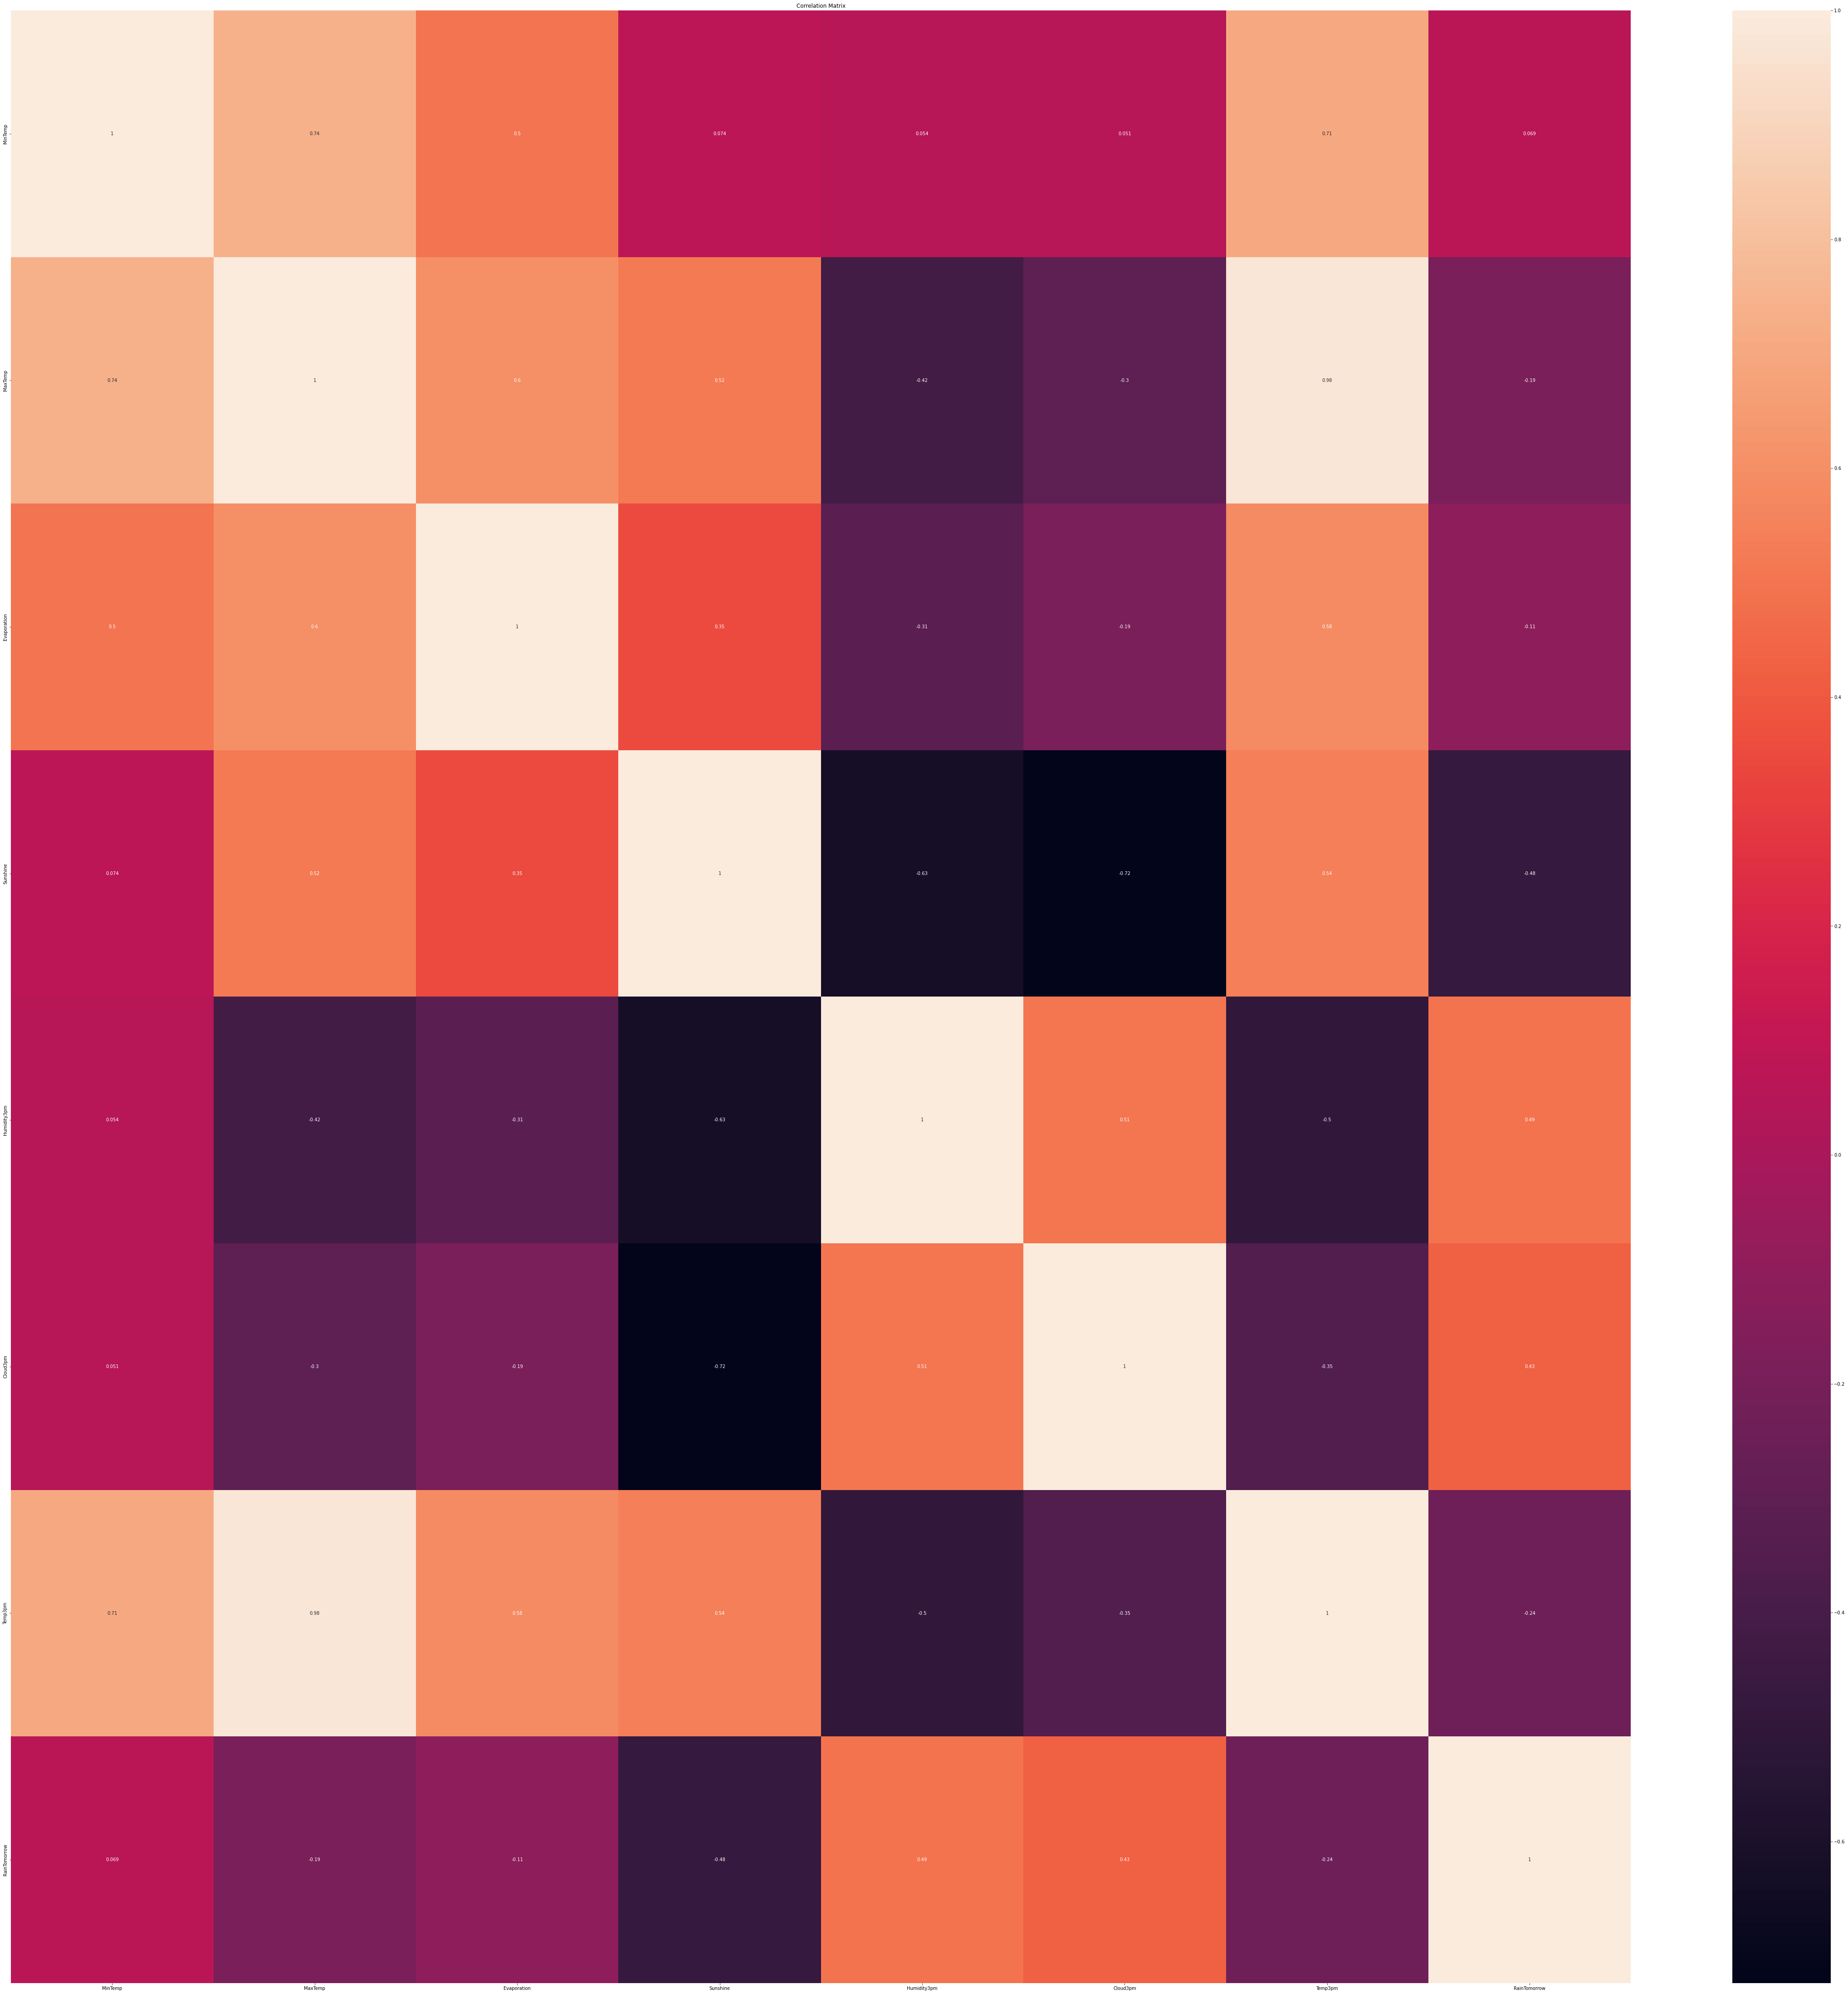

In [26]:
corr_mat=df.corr()
# Size of the canvas
plt.figure(figsize=[80,80])
# Plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('Rainfall correlation_matrix.jpg')
plt.show()

Can't able to identify the correlation because there are more columns. so we shall try another method 

In [27]:
corr_matrix=df.corr()
corr_matrix

,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm,RainTomorrow
MinTemp,1.000000,0.737507,0.497595,0.073721,0.053815,0.051234,0.709369,0.068591
MaxTemp,0.737507,1.000000,0.597566,0.517222,-0.420550,-0.304188,0.976599,-0.189499
Evaporation,0.497595,0.597566,1.000000,0.349778,-0.314454,-0.188376,0.582955,-0.106155
Sunshine,0.073721,0.517222,0.349778,1.000000,-0.627181,-0.723712,0.542085,-0.480887
Humidity3pm,0.053815,-0.420550,-0.314454,-0.627181,1.000000,0.506716,-0.497081,0.489199
Cloud3pm,0.051234,-0.304188,-0.188376,-0.723712,0.506716,1.000000,-0.354987,0.427189
Temp3pm,0.709369,0.976599,0.582955,0.542085,-0.497081,-0.354987,1.000000,-0.237371
RainTomorrow,0.068591,-0.189499,-0.106155,-0.480887,0.489199,0.427189,-0.237371,1.000000


In [28]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [29]:
corr_matrix=df.corr()
corr_matrix['RainTomorrow'].sort_values(ascending=False)

RainTomorrow    1.000000
Humidity3pm     0.489199
Cloud3pm        0.427189
MinTemp         0.068591
Evaporation    -0.106155
MaxTemp        -0.189499
Temp3pm        -0.237371
Sunshine       -0.480887
Name: RainTomorrow, dtype: float64

There is a strong positive correlation between Humidity3pm and RainTomorrow also there is weak 
positive correaltion between the Mintemp and RainTomorrow. There is a strong negative correlation 
between Evaporation and RainTomorrow also there is a weak negative correlation between Sunshine and
RainTomorrow

Let's check the data distribution among all the columns

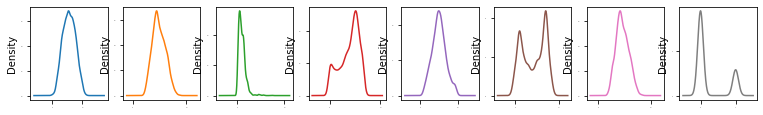

In [30]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

We can see skewness in columns.Lets handle skewness in further steps

Splitting the Independent and Target variables in x and y before removing the skewness

In [31]:
x=df.drop('RainTomorrow',axis=1)
y=df['RainTomorrow']

In [32]:
x

,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm
907,19.8,27.1,8.6,9.0,60.0,6.0,26.0
908,18.7,25.6,3.8,3.4,90.0,7.0,20.9
909,16.5,25.5,2.8,6.1,65.0,7.0,24.5
910,18.5,26.9,3.2,11.0,60.0,5.0,26.4
911,18.2,28.2,6.8,9.0,68.0,1.0,25.9
...,...,...,...,...,...,...,...
8381,25.2,34.5,4.0,9.2,46.0,7.0,33.4
8382,26.2,33.3,6.0,5.9,93.0,8.0,25.2
8383,24.9,32.8,6.2,8.7,55.0,6.0,32.0
8384,25.5,33.1,4.8,7.1,58.0,7.0,31.5


In [33]:
y

907     1
908     1
909     0
910     0
911     1
       ..
8381    0
8382    1
8383    0
8384    0
8385    0
Name: RainTomorrow, Length: 3942, dtype: int32

In [34]:
# Checking  the skewness
x.skew().sort_values(ascending=False)

Evaporation    2.106943
Temp3pm        0.252833
MaxTemp        0.251113
Humidity3pm    0.188305
MinTemp        0.030742
Cloud3pm      -0.149415
Sunshine      -0.587638
dtype: float64

We can see skewness in many columns will remove skewness using Power transform methods

In [35]:
from sklearn.preprocessing import power_transform 

In [36]:
x_new=power_transform(x)

In [37]:
# Checking skewness
pd.DataFrame(x_new).skew().sort_values(ascending=False)

2    0.000606
6   -0.020068
1   -0.020337
4   -0.025227
0   -0.070152
5   -0.257103
3   -0.401753
dtype: float64

In [38]:
type(x_new)

numpy.ndarray

In [39]:
x.columns

Index(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'Humidity3pm',
       'Cloud3pm', 'Temp3pm'],
      dtype='object')

In [40]:
x=pd.DataFrame(x_new,columns=x.columns)

In [41]:
x

,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm
0,1.110607,0.454073,1.052568,0.264864,0.602861,0.694290,0.528344
1,0.907945,0.215410,-0.228903,-1.190045,2.144050,1.028530,-0.327285
2,0.498292,0.199253,-0.641813,-0.525015,0.869056,1.028530,0.285454
3,0.870948,0.422641,-0.466058,0.845611,0.602861,0.348617,0.592009
4,0.815364,0.624905,0.659641,0.264864,1.026756,-1.221027,0.512357
...,...,...,...,...,...,...,...
3937,2.087563,1.544493,-0.155788,0.321720,-0.168453,1.028530,1.641296
3938,2.265581,1.376319,0.457968,-0.576865,2.291774,1.353086,0.399636
3939,2.033994,1.305344,0.510266,0.180116,0.332097,0.694290,1.440332
3940,2.141055,1.347994,0.112484,-0.260386,0.495129,1.028530,1.367566


In [42]:
x.skew().sort_values(ascending=False)

Evaporation    0.000606
Temp3pm       -0.020068
MaxTemp       -0.020337
Humidity3pm   -0.025227
MinTemp       -0.070152
Cloud3pm      -0.257103
Sunshine      -0.401753
dtype: float64

In [43]:
sk=x.skew()

In [44]:
sk

MinTemp       -0.070152
MaxTemp       -0.020337
Evaporation    0.000606
Sunshine      -0.401753
Humidity3pm   -0.025227
Cloud3pm      -0.257103
Temp3pm       -0.020068
dtype: float64

In [45]:
sk[np.abs(sk)>0.5].all()

True

In [46]:
sk[np.abs(sk)>0.5]

Series([], dtype: float64)

In [47]:
x.skew()[np.abs(x.skew())<0.25].all()

True

Skewness has been removed now we can proceed with further steps

# Checking Outliers

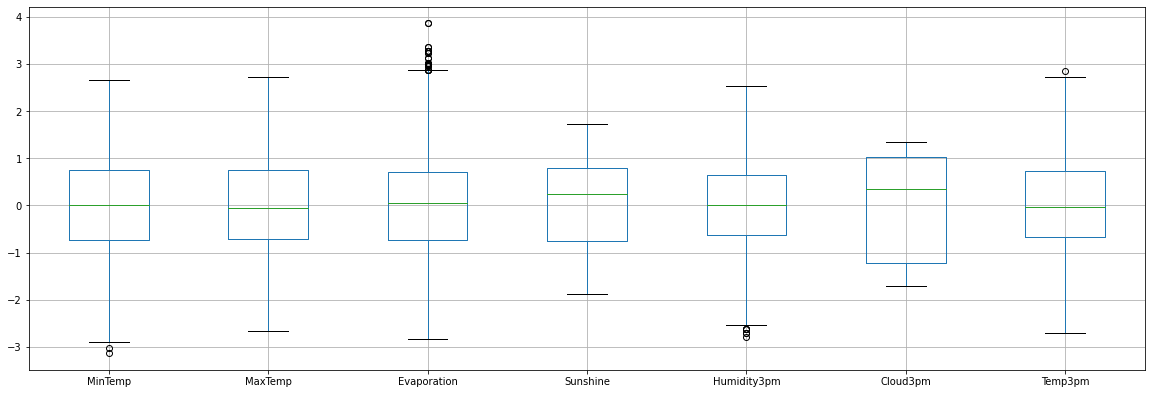

In [48]:
# Plotting Boxplot for the available columns
x.iloc[:,0:8].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [49]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

MinTemp        False
MaxTemp         True
Evaporation    False
Sunshine        True
Humidity3pm     True
Cloud3pm        True
Temp3pm         True
dtype: bool

Therefore Evaporation Min temparature are contains outliers 

# Remove Outliers

In [50]:
features=['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'Humidity3pm',
       'Cloud3pm', 'Temp3pm']

In [51]:
# Define a functions called outliers which returns a list of index of outliers
# IQR = q3-q1
def outliers(df,ft):
    q1=df[ft].quantile(0.25)
    q3=df[ft].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    ls=df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]
    return ls

In [52]:
# creating the empty list to store the output variable from multiple columns
index_list=[]
for i in features:
    index_list.extend(outliers(df,i))

In [53]:
index_list

[4618,
 5429,
 7983,
 7984,
 2827,
 2835,
 2841,
 2849,
 2855,
 2863,
 2869,
 2877,
 2891,
 2897,
 2905,
 2911,
 2919,
 2925,
 2933,
 2939,
 2947,
 2953,
 2961,
 2967,
 2975,
 2989,
 3009,
 3679,
 3687,
 3693,
 3701,
 3707,
 3715,
 3721,
 3729,
 3743,
 3749,
 3757,
 3763,
 3771,
 3777,
 3785,
 3791,
 3799,
 3805,
 3813,
 3819,
 3827,
 3841,
 3861,
 4565,
 4566,
 4593,
 4600,
 4607,
 4608,
 4619,
 4638,
 4658,
 4659,
 5310,
 5324,
 5376,
 5377,
 5404,
 5411,
 5418,
 5419,
 5430,
 5449,
 5469,
 5470,
 6121,
 6135,
 6932,
 6960,
 6961,
 6975,
 6977,
 7002,
 7304,
 7325,
 7326,
 7954,
 7957,
 7984,
 7993,
 8024,
 1150,
 1202,
 3002,
 3854,
 4672,
 5483,
 6488,
 6491,
 6546,
 6583,
 6643,
 6658,
 7114,
 7275,
 4618,
 4972,
 5429,
 5783,
 7326,
 7328,
 7371,
 7983]

In [54]:
# define a function called remove which returns a cleaned dataframe without outliers
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [55]:
df_cleaned=remove(df,index_list)

In [56]:
df_cleaned.shape

(3837, 8)

In [59]:
df_cleaned

,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm,RainTomorrow
907,19.8,27.1,8.6,9.0,60.0,6.0,26.0,1
908,18.7,25.6,3.8,3.4,90.0,7.0,20.9,1
909,16.5,25.5,2.8,6.1,65.0,7.0,24.5,0
910,18.5,26.9,3.2,11.0,60.0,5.0,26.4,0
911,18.2,28.2,6.8,9.0,68.0,1.0,25.9,1
...,...,...,...,...,...,...,...,...
8381,25.2,34.5,4.0,9.2,46.0,7.0,33.4,0
8382,26.2,33.3,6.0,5.9,93.0,8.0,25.2,1
8383,24.9,32.8,6.2,8.7,55.0,6.0,32.0,0
8384,25.5,33.1,4.8,7.1,58.0,7.0,31.5,0


Let's Quantify 

Splitting independent and dependent variables in x and y before removing the skewness


In [60]:
x=df_cleaned.drop('RainTomorrow',axis=1)
y=df_cleaned['RainTomorrow']

In [61]:
x

,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm
907,19.8,27.1,8.6,9.0,60.0,6.0,26.0
908,18.7,25.6,3.8,3.4,90.0,7.0,20.9
909,16.5,25.5,2.8,6.1,65.0,7.0,24.5
910,18.5,26.9,3.2,11.0,60.0,5.0,26.4
911,18.2,28.2,6.8,9.0,68.0,1.0,25.9
...,...,...,...,...,...,...,...
8381,25.2,34.5,4.0,9.2,46.0,7.0,33.4
8382,26.2,33.3,6.0,5.9,93.0,8.0,25.2
8383,24.9,32.8,6.2,8.7,55.0,6.0,32.0
8384,25.5,33.1,4.8,7.1,58.0,7.0,31.5


In [62]:
y

907     1
908     1
909     0
910     0
911     1
       ..
8381    0
8382    1
8383    0
8384    0
8385    0
Name: RainTomorrow, Length: 3837, dtype: int32

In [63]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

MinTemp         True
MaxTemp         True
Evaporation    False
Sunshine        True
Humidity3pm     True
Cloud3pm        True
Temp3pm         True
dtype: bool

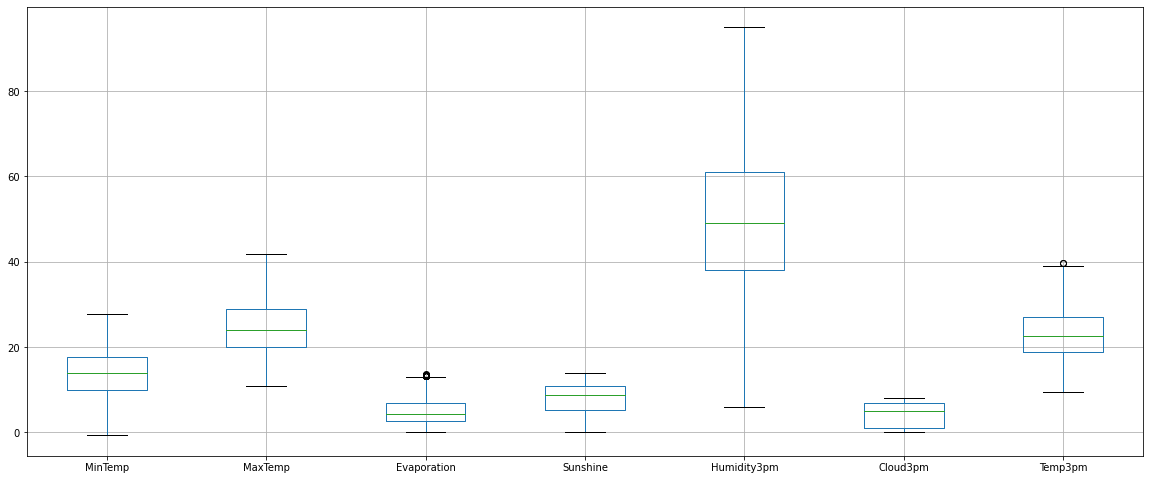

In [65]:
# Plotting the boxplot for the columns
x.iloc[:,0:8].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.1)
plt.show()

Therefore we have removed most of the outliers and there is no problem in working with this outliers

Let's remove skewness

In [66]:
from sklearn.preprocessing import power_transform

In [67]:
x_new=power_transform(x)

In [68]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

1   -0.023473
6   -0.023724
4   -0.026039
2   -0.037517
0   -0.065810
5   -0.258136
3   -0.398652
dtype: float64

In [69]:
type(x_new)

numpy.ndarray

In [70]:
x.columns

Index(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'Humidity3pm',
       'Cloud3pm', 'Temp3pm'],
      dtype='object')

In [71]:
x=pd.DataFrame(x_new,columns=x.columns)

In [72]:
x

,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm
0,1.135548,0.479790,1.228834,0.266648,0.609999,0.699118,0.554067
1,0.934039,0.237471,-0.246793,-1.195289,2.186547,1.035105,-0.313893
2,0.525961,0.221085,-0.671762,-0.527933,0.881819,1.035105,0.306821
3,0.897227,0.447846,-0.493765,0.851758,0.609999,0.351848,0.618982
4,0.841905,0.653555,0.750317,0.266648,1.042953,-1.221418,0.537773
...,...,...,...,...,...,...,...
3832,2.103870,1.593270,-0.169059,0.323901,-0.176258,1.035105,1.695050
3833,2.279817,1.420883,0.513820,-0.580028,2.337983,1.361527,0.422969
3834,2.050896,1.348201,0.574564,0.181320,0.333750,0.699118,1.488083
3835,2.156755,1.391872,0.122697,-0.261917,0.500056,1.035105,1.413243


In [73]:
x.skew().sort_values(ascending=False)

MaxTemp       -0.023473
Temp3pm       -0.023724
Humidity3pm   -0.026039
Evaporation   -0.037517
MinTemp       -0.065810
Cloud3pm      -0.258136
Sunshine      -0.398652
dtype: float64

In [74]:
sk=x.skew()

In [75]:
sk

MinTemp       -0.065810
MaxTemp       -0.023473
Evaporation   -0.037517
Sunshine      -0.398652
Humidity3pm   -0.026039
Cloud3pm      -0.258136
Temp3pm       -0.023724
dtype: float64

In [76]:
sk[np.abs(sk)>0.5].all()

True

In [77]:
sk[np.abs(sk)>0.5]

Series([], dtype: float64)

In [78]:
x.skew()[np.abs(x.skew())<0.25].all()

True

Therefore skewness has been removed

# Training Process Begin

Finding The Best Random State

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [80]:
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print('accuracy',acc,'random state',i)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
        print('accuracy',maxaccu,'random state',i)

accuracy 0.84765625 random state 1
accuracy 0.84765625 random state 1
accuracy 0.8294270833333334 random state 2
accuracy 0.8502604166666666 random state 3
accuracy 0.8502604166666666 random state 3
accuracy 0.83203125 random state 4
accuracy 0.8177083333333334 random state 5
accuracy 0.8111979166666666 random state 6
accuracy 0.8424479166666666 random state 7
accuracy 0.8385416666666666 random state 8
accuracy 0.84375 random state 9
accuracy 0.84765625 random state 10
accuracy 0.8229166666666666 random state 11
accuracy 0.83203125 random state 12
accuracy 0.8268229166666666 random state 13
accuracy 0.84375 random state 14
accuracy 0.85546875 random state 15
accuracy 0.85546875 random state 15
accuracy 0.82421875 random state 16
accuracy 0.82421875 random state 17
accuracy 0.8059895833333334 random state 18
accuracy 0.8138020833333334 random state 19
accuracy 0.81640625 random state 20
accuracy 0.8268229166666666 random state 21
accuracy 0.83203125 random state 22
accuracy 0.8151041666

accuracy 0.8463541666666666 random state 197
accuracy 0.8333333333333334 random state 198
accuracy 0.85546875 random state 199


In [81]:
print('Best Accuracy is',maxaccu,'random state',maxrs)

Best Accuracy is 0.8645833333333334 random state 26


We have found best random state as 26. We will create our train_test_split using this random_state

Creating Train Test Split

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=26)

In [83]:
x_train

,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm
3379,-0.255721,1.391872,1.561119,1.493803,-2.275680,-1.710754,1.606808
1450,-0.062193,-0.045253,-0.326712,-0.125631,-0.061373,-1.221418,0.121458
3419,-0.062193,0.653555,1.781584,1.369480,-1.650420,-1.710754,0.731597
1141,-0.023726,-0.712982,0.052401,-0.070536,0.555118,0.699118,-0.752713
2848,-0.042950,1.052157,0.451912,0.851758,-1.198104,-1.221418,1.185658
...,...,...,...,...,...,...,...
1985,-0.930838,-0.731304,-0.169059,0.585072,-1.261327,-1.710754,-0.530532
1456,0.878800,0.188224,0.806897,-1.795005,-0.766310,1.035105,0.273382
1798,-1.364351,-1.481984,-0.671762,-0.015117,-0.826936,-0.387169,-1.396644
1342,0.488504,1.274998,1.908048,-0.422612,-1.261327,1.035105,1.000116


In [84]:
x_test

,MinTemp,MaxTemp,Evaporation,Sunshine,Humidity3pm,Cloud3pm,Temp3pm
2809,0.730880,0.885508,1.228834,1.215389,0.165678,0.699118,0.827156
696,0.563355,0.622199,0.862544,1.307667,0.052591,-1.221418,0.763548
3289,-0.749259,-0.992372,-1.294966,0.153027,-0.118698,-0.387169,-0.980934
2340,0.934039,-0.215914,-1.416595,-1.741160,2.438411,1.361527,-0.242836
2676,-0.412061,-0.354933,0.574564,-0.884145,-0.586324,0.699118,-0.207515
...,...,...,...,...,...,...,...
2595,-0.709211,-2.184622,-0.246793,-1.878468,2.135850,1.361527,-2.056075
2891,-0.197448,-0.372472,-1.827772,-0.809533,-0.292110,1.035105,-0.278294
1965,-1.197431,-0.712982,0.191399,0.295238,-0.467816,-1.710754,-0.567165
1030,-0.951157,-1.899086,-0.493765,-1.846130,0.333750,1.361527,-1.858217


In [85]:
y_train

7920    0
5508    0
7962    0
5034    0
7388    0
       ..
6289    0
5514    1
6003    0
5390    0
4632    0
Name: RainTomorrow, Length: 3069, dtype: int32

In [86]:
y_test

7348    0
3787    0
7830    0
6659    1
7208    0
       ..
7127    1
7431    0
6269    0
4850    1
1087    0
Name: RainTomorrow, Length: 768, dtype: int32

# Model Evaluation

1. Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 86.45833333333334
[[564  32]
 [ 72 100]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       596
           1       0.76      0.58      0.66       172

    accuracy                           0.86       768
   macro avg       0.82      0.76      0.79       768
weighted avg       0.86      0.86      0.86       768



2. Decision Tree Classifier model

In [88]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred2=dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred2)*100)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred))

Accuracy 83.85416666666666
[[540  56]
 [ 68 104]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       596
           1       0.76      0.58      0.66       172

    accuracy                           0.86       768
   macro avg       0.82      0.76      0.79       768
weighted avg       0.86      0.86      0.86       768



3. Random Forest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred3=rf.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred3)*100)
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

Accuracy 88.28125
[[572  24]
 [ 66 106]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       596
           1       0.82      0.62      0.70       172

    accuracy                           0.88       768
   macro avg       0.86      0.79      0.81       768
weighted avg       0.88      0.88      0.88       768



4. Support Vector Classifier

In [91]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred4=svc.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred4)*100)
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

Accuracy 86.71875
[[577  19]
 [ 83  89]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       596
           1       0.82      0.52      0.64       172

    accuracy                           0.87       768
   macro avg       0.85      0.74      0.78       768
weighted avg       0.86      0.87      0.86       768



5. AdaBoostClassifier

In [92]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
y_pred5=ad.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred5)*100)
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

Accuracy 85.41666666666666
[[560  36]
 [ 76  96]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       596
           1       0.73      0.56      0.63       172

    accuracy                           0.85       768
   macro avg       0.80      0.75      0.77       768
weighted avg       0.85      0.85      0.85       768



6. Gradient Boosting Classifier

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred6=gb.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred6)*100)
print(confusion_matrix(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

Accuracy 86.45833333333334
[[561  35]
 [ 69 103]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       596
           1       0.75      0.60      0.66       172

    accuracy                           0.86       768
   macro avg       0.82      0.77      0.79       768
weighted avg       0.86      0.86      0.86       768



Random Forest Classifier model perform well with an accuracy of 89% and after that Support vector is 
perfoming well with an accuracy of 87%, Logistic regression,Gradient Boosting performs well with an 
accuracy of 86.45%.

# Cross Validation

In [96]:
from sklearn.model_selection import cross_val_score
scr1=cross_val_score(lr,x,y,cv=5)
print('Cross Validation Score of Logistic Regression model:',scr1.mean())

Cross Validation Score of Logistic Regression model: 0.8178404090612776


In [97]:
scr2=cross_val_score(dt,x,y,cv=5)
print('Cross validation score of Decision Tree model:',scr2.mean())

Cross validation score of Decision Tree model: 0.8092307013255107


In [98]:
scr3=cross_val_score(rf,x,y,cv=5)
print('Cross validation score of Random Forest model:',scr3.mean())

Cross validation score of Random Forest model: 0.8587475554106911


In [99]:
scr4=cross_val_score(svc,x,y,cv=5)
print('Cross validation score of Support vector model:',scr4.mean())

Cross validation score of Support vector model: 0.8212210723598435


In [100]:
scr5=cross_val_score(ad,x,y,cv=5)
print('Cross validation score of AdaBoost model:',scr5.mean())

Cross validation score of AdaBoost model: 0.8131471371142981


In [101]:
scr6=cross_val_score(gb,x,y,cv=5)
print('Cross validation score of Gradient Boost model:',scr6.mean())

Cross validation score of Gradient Boost model: 0.8183595447631464


In [ ]:
cross validation score of Random Forest model is providing highest score of 85.87

# b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df_n=pd.read_csv('weatherAUS.csv')

In [3]:
df_n

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Exploratory Data Analysis

In [4]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [5]:
df_n.shape

(8425, 23)

In [6]:
df_n.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df_n.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [8]:
df_n.sample()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
7766,2013-06-08,PerthAirport,6.3,20.4,0.0,3.2,5.9,SW,30.0,N,...,76.0,58.0,1020.5,1017.9,5.0,3.0,10.9,19.2,No,No


In [9]:
df=df_n.drop(['Date','Location','Evaporation','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm',
           'WindSpeed9am','WindSpeed3pm','Pressure9am','Pressure3pm','RainToday','RainTomorrow'],axis=1)

In [10]:
df

,MinTemp,MaxTemp,Rainfall,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,71.0,22.0,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,44.0,25.0,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,38.0,30.0,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,45.0,16.0,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,82.0,33.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.4,0.0,NaN,51.0,24.0,NaN,NaN,10.1,22.4
8421,3.6,25.3,0.0,NaN,56.0,21.0,NaN,NaN,10.9,24.5
8422,5.4,26.9,0.0,NaN,53.0,24.0,NaN,NaN,12.5,26.1
8423,7.8,27.0,0.0,NaN,51.0,24.0,3.0,2.0,15.1,26.0


In [11]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4431.000000,8366.000000,8323.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,7.632205,67.822496,51.249790,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,3.896235,16.833283,18.423774,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,10.000000,6.000000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,4.750000,56.000000,39.000000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,8.700000,68.000000,51.000000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,10.700000,80.000000,63.000000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,13.900000,100.000000,99.000000,8.000000,8.000000,39.400000,44.100000


Checking Null Values

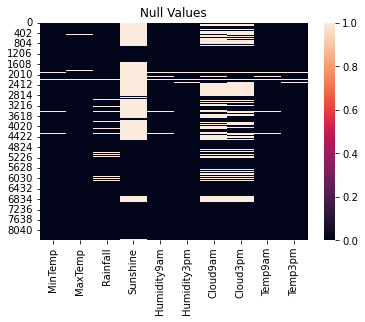

In [12]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

Dropping null values for better performing of datasets

In [13]:
df.isnull().sum().sum()

9558

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum().sum()

0

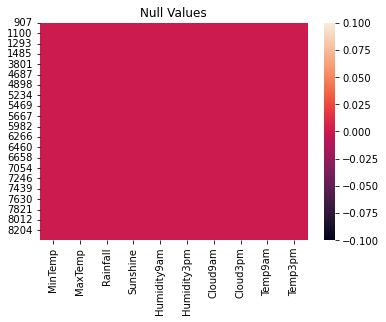

In [16]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [17]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'Humidity9am',
       'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

# Checking the Correlation

In [18]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736618,0.078867,0.070686,-0.077567,0.056429,0.136766,0.051914,0.859410,0.708668
MaxTemp,0.736618,1.000000,-0.091922,0.518178,-0.420552,-0.420862,-0.307464,-0.304189,0.890263,0.976807
Rainfall,0.078867,-0.091922,1.000000,-0.217305,0.262882,0.245646,0.196359,0.159255,-0.025296,-0.090964
Sunshine,0.070686,0.518178,-0.217305,1.000000,-0.519928,-0.631944,-0.705642,-0.723469,0.344701,0.542258
Humidity9am,-0.077567,-0.420552,0.262882,-0.519928,1.000000,0.663262,0.446213,0.354607,-0.361618,-0.411041
Humidity3pm,0.056429,-0.420862,0.245646,-0.631944,0.663262,1.000000,0.493898,0.506423,-0.147697,-0.496020
Cloud9am,0.136766,-0.307464,0.196359,-0.705642,0.446213,0.493898,1.000000,0.646808,-0.159450,-0.328045
Cloud3pm,0.051914,-0.304189,0.159255,-0.723469,0.354607,0.506423,0.646808,1.000000,-0.162131,-0.353774
Temp9am,0.859410,0.890263,-0.025296,0.344701,-0.361618,-0.147697,-0.159450,-0.162131,1.000000,0.857326
Temp3pm,0.708668,0.976807,-0.090964,0.542258,-0.411041,-0.496020,-0.328045,-0.353774,0.857326,1.000000


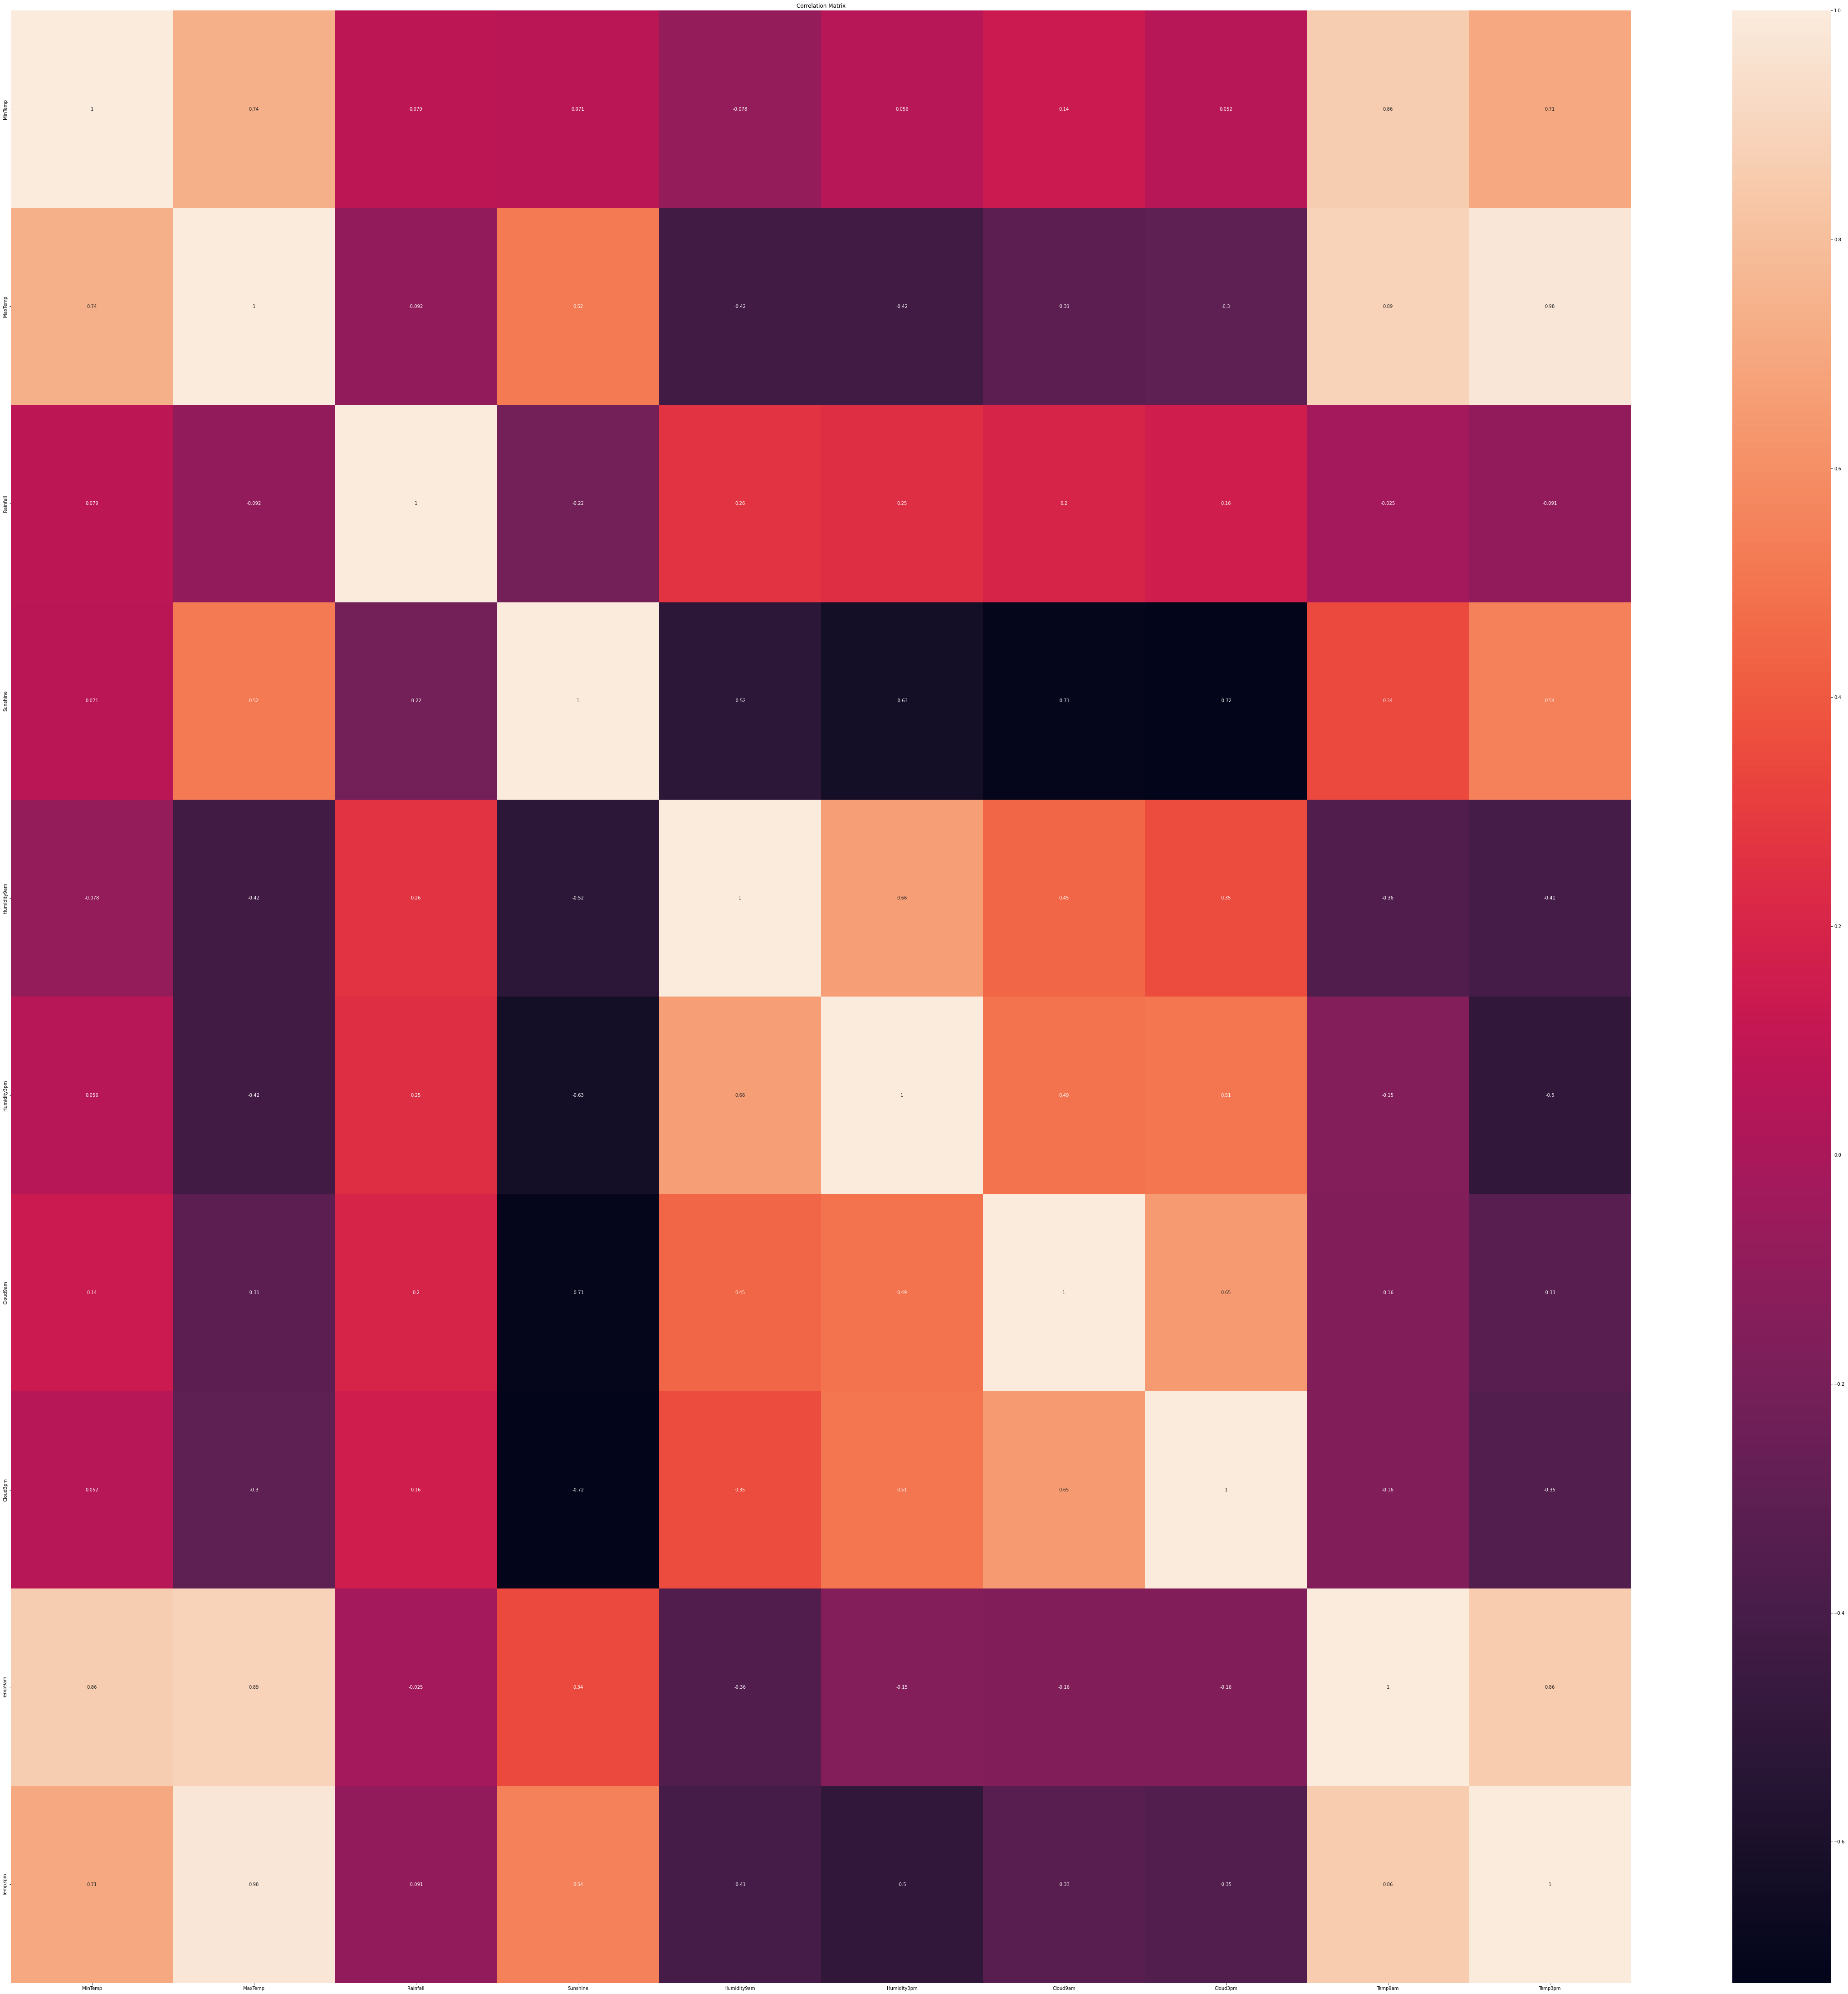

In [19]:
corr_mat=df.corr()
# Size of the canvas
plt.figure(figsize=[80,80])
# plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('Rainfall 2 Correlation Matrix.jpg')
plt.show()

Unable to find out the correlation due to high number of columns


In [20]:
corr_matrix=df.corr()
corr_matrix

,MinTemp,MaxTemp,Rainfall,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736618,0.078867,0.070686,-0.077567,0.056429,0.136766,0.051914,0.859410,0.708668
MaxTemp,0.736618,1.000000,-0.091922,0.518178,-0.420552,-0.420862,-0.307464,-0.304189,0.890263,0.976807
Rainfall,0.078867,-0.091922,1.000000,-0.217305,0.262882,0.245646,0.196359,0.159255,-0.025296,-0.090964
Sunshine,0.070686,0.518178,-0.217305,1.000000,-0.519928,-0.631944,-0.705642,-0.723469,0.344701,0.542258
Humidity9am,-0.077567,-0.420552,0.262882,-0.519928,1.000000,0.663262,0.446213,0.354607,-0.361618,-0.411041
Humidity3pm,0.056429,-0.420862,0.245646,-0.631944,0.663262,1.000000,0.493898,0.506423,-0.147697,-0.496020
Cloud9am,0.136766,-0.307464,0.196359,-0.705642,0.446213,0.493898,1.000000,0.646808,-0.159450,-0.328045
Cloud3pm,0.051914,-0.304189,0.159255,-0.723469,0.354607,0.506423,0.646808,1.000000,-0.162131,-0.353774
Temp9am,0.859410,0.890263,-0.025296,0.344701,-0.361618,-0.147697,-0.159450,-0.162131,1.000000,0.857326
Temp3pm,0.708668,0.976807,-0.090964,0.542258,-0.411041,-0.496020,-0.328045,-0.353774,0.857326,1.000000


In [21]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [22]:
corr_matrix=df.corr()
corr_matrix['Rainfall'].sort_values(ascending=False)

Rainfall       1.000000
Humidity9am    0.262882
Humidity3pm    0.245646
Cloud9am       0.196359
Cloud3pm       0.159255
MinTemp        0.078867
Temp9am       -0.025296
Temp3pm       -0.090964
MaxTemp       -0.091922
Sunshine      -0.217305
Name: Rainfall, dtype: float64

We can clearly see that there is a strong positive correlation is between the Humidity9am, humidity3pm
and Rainfall also weak positive correlation is between Mintemp and Rainfall. Also, there is strong 
negative correlation is between Temp9am and Rainfall, weak negative correlation is between Sunshine and Rainfall

Splitting independent and dependent variables in x and y

In [23]:
x=df.drop('Rainfall',axis=1)
y=df['Rainfall']

# Checking outliers

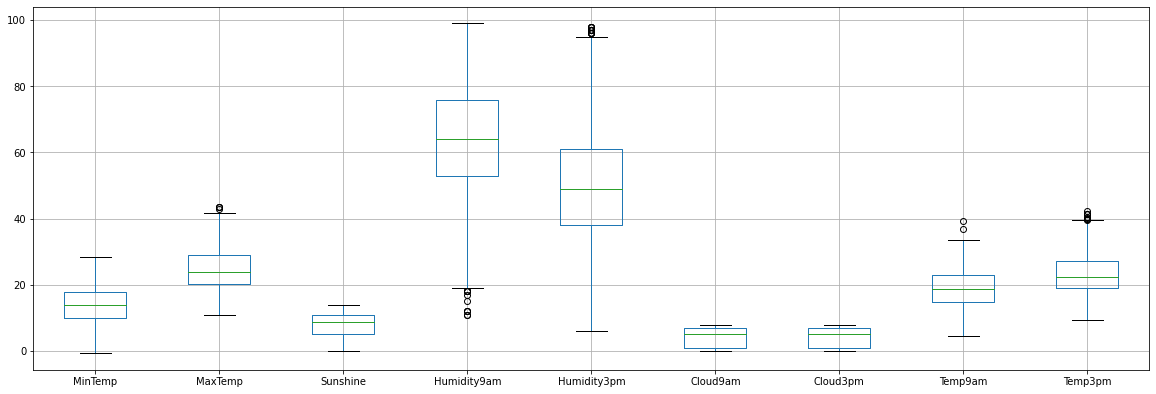

In [33]:
# Plotting boxplot for columns
x.iloc[:,0:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

Removing outliers

In [27]:
feature=['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'Humidity9am',
       'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

In [26]:
def outliers(df,ft):
    q1=df[ft].quantile(0.25)
    q3=df[ft].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    ls=df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]
    return ls

In [28]:
index_list2=[]
for i in feature:
    index_list2.extend(outliers(df,i))

In [29]:
index_list2

[4618,
 5429,
 7983,
 7984,
 907,
 908,
 909,
 912,
 920,
 925,
 927,
 928,
 930,
 931,
 932,
 933,
 934,
 935,
 936,
 937,
 940,
 941,
 942,
 943,
 948,
 949,
 950,
 951,
 962,
 964,
 969,
 977,
 979,
 980,
 981,
 982,
 983,
 989,
 991,
 992,
 1005,
 1007,
 1008,
 1009,
 1010,
 1011,
 1012,
 1027,
 1028,
 1029,
 1030,
 1103,
 1115,
 1116,
 1122,
 1130,
 1137,
 1138,
 1139,
 1148,
 1149,
 1150,
 1151,
 1156,
 1171,
 1174,
 1175,
 1183,
 1187,
 1191,
 1201,
 1202,
 1203,
 1232,
 1234,
 1235,
 1236,
 1237,
 1238,
 1240,
 1241,
 1243,
 1244,
 1250,
 1255,
 1258,
 1260,
 1261,
 1264,
 1265,
 1266,
 1268,
 1270,
 1273,
 1274,
 1275,
 1276,
 1294,
 1310,
 1311,
 1312,
 1313,
 1314,
 1319,
 1327,
 1328,
 1341,
 1342,
 1347,
 1350,
 1351,
 1353,
 1356,
 1357,
 1358,
 1368,
 1369,
 1376,
 1377,
 1378,
 1387,
 1392,
 1404,
 1411,
 1412,
 1413,
 1425,
 1426,
 1438,
 1450,
 1451,
 1466,
 1467,
 1468,
 1475,
 1478,
 1479,
 1480,
 1481,
 1482,
 1483,
 1484,
 1485,
 1486,
 1487,
 1488,
 1492,
 1496,


In [30]:
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [31]:
df_cleaned=remove(df,index_list2)

In [32]:
df_cleaned.shape

(3175, 10)

Splitting independent and dependent variable in x and y

In [35]:
x=df_cleaned.drop('Rainfall',axis=1)
y=df_cleaned['Rainfall']

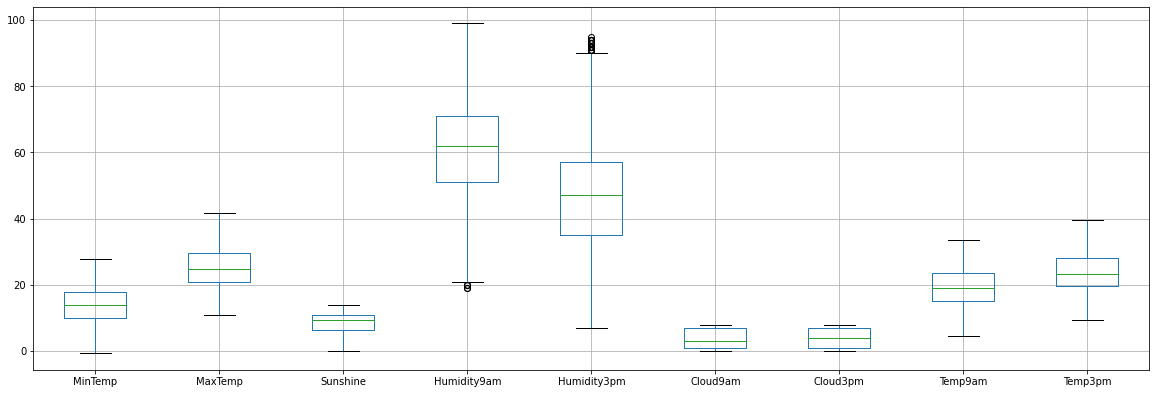

In [36]:
x.iloc[:,0:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

So we have removed most of the outliers in the dataframe. Lets proceed with further steps

Let's check the data distribution among all the columns


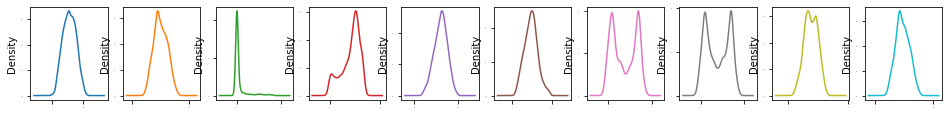

In [37]:
df_cleaned.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

We can skewness in multiple columns will remove skewness in further steps

In [38]:
# Checking skewness
x.skew().sort_values(ascending=False)

Humidity3pm    0.165122
Temp3pm        0.127335
MaxTemp        0.119126
Cloud9am       0.066172
Cloud3pm       0.027434
MinTemp        0.011715
Temp9am       -0.065518
Humidity9am   -0.201184
Sunshine      -0.806988
dtype: float64

We can skewness in multiple columns we shall remove skewness using Power transform method

In [39]:
from sklearn.preprocessing import power_transform 
x_new=power_transform(x)

In [40]:
type(x_new)

numpy.ndarray

In [41]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

8   -0.029904
4   -0.030260
1   -0.031638
3   -0.049184
7   -0.063165
0   -0.079566
5   -0.173987
6   -0.184974
2   -0.436997
dtype: float64

In [42]:
x.columns

Index(['MinTemp', 'MaxTemp', 'Sunshine', 'Humidity9am', 'Humidity3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

In [43]:
x=pd.DataFrame(x_new,columns=x.columns)

In [44]:
x

,MinTemp,MaxTemp,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.875721,0.305670,0.733125,0.464795,0.805212,-0.484444,0.509791,0.739116,0.480666
1,0.820816,0.516993,0.075907,0.395101,1.258466,-0.956486,-1.080654,0.866130,0.397298
2,1.058064,-0.025446,-1.523080,0.395101,1.756244,-0.090125,1.113031,0.757260,-0.410650
3,0.489297,0.024708,-0.601568,1.464849,1.089770,0.849258,0.174465,0.394437,0.059088
4,1.094412,0.141055,-0.683224,0.816847,1.033207,0.849258,0.509791,0.358161,0.178349
...,...,...,...,...,...,...,...,...,...
3170,2.115176,1.319802,0.107324,1.030858,1.258466,0.849258,0.174465,1.919023,1.448609
3171,2.185815,1.258226,-0.601568,0.604906,1.089770,0.565205,-0.602845,2.082476,1.385788
3172,2.256335,1.319802,-0.815649,0.325654,2.614527,0.254930,1.389194,1.991667,0.279804
3173,2.132847,1.289042,-0.490191,0.050372,0.690123,1.112636,1.113031,1.701116,1.306942


In [45]:
x.skew().sort_values(ascending=False)

Temp3pm       -0.029904
Humidity3pm   -0.030260
MaxTemp       -0.031638
Humidity9am   -0.049184
Temp9am       -0.063165
MinTemp       -0.079566
Cloud9am      -0.173987
Cloud3pm      -0.184974
Sunshine      -0.436997
dtype: float64

In [46]:
sk=x.skew()

In [47]:
sk

MinTemp       -0.079566
MaxTemp       -0.031638
Sunshine      -0.436997
Humidity9am   -0.049184
Humidity3pm   -0.030260
Cloud9am      -0.173987
Cloud3pm      -0.184974
Temp9am       -0.063165
Temp3pm       -0.029904
dtype: float64

In [48]:
sk[np.abs(sk)>0.5].all()

True

In [49]:
sk[np.abs(sk)>0.5]

Series([], dtype: float64)

In [50]:
x.skew()[np.abs(x.skew())<0.25].all()

True

Skewness has been removed now we can proceed with further steps

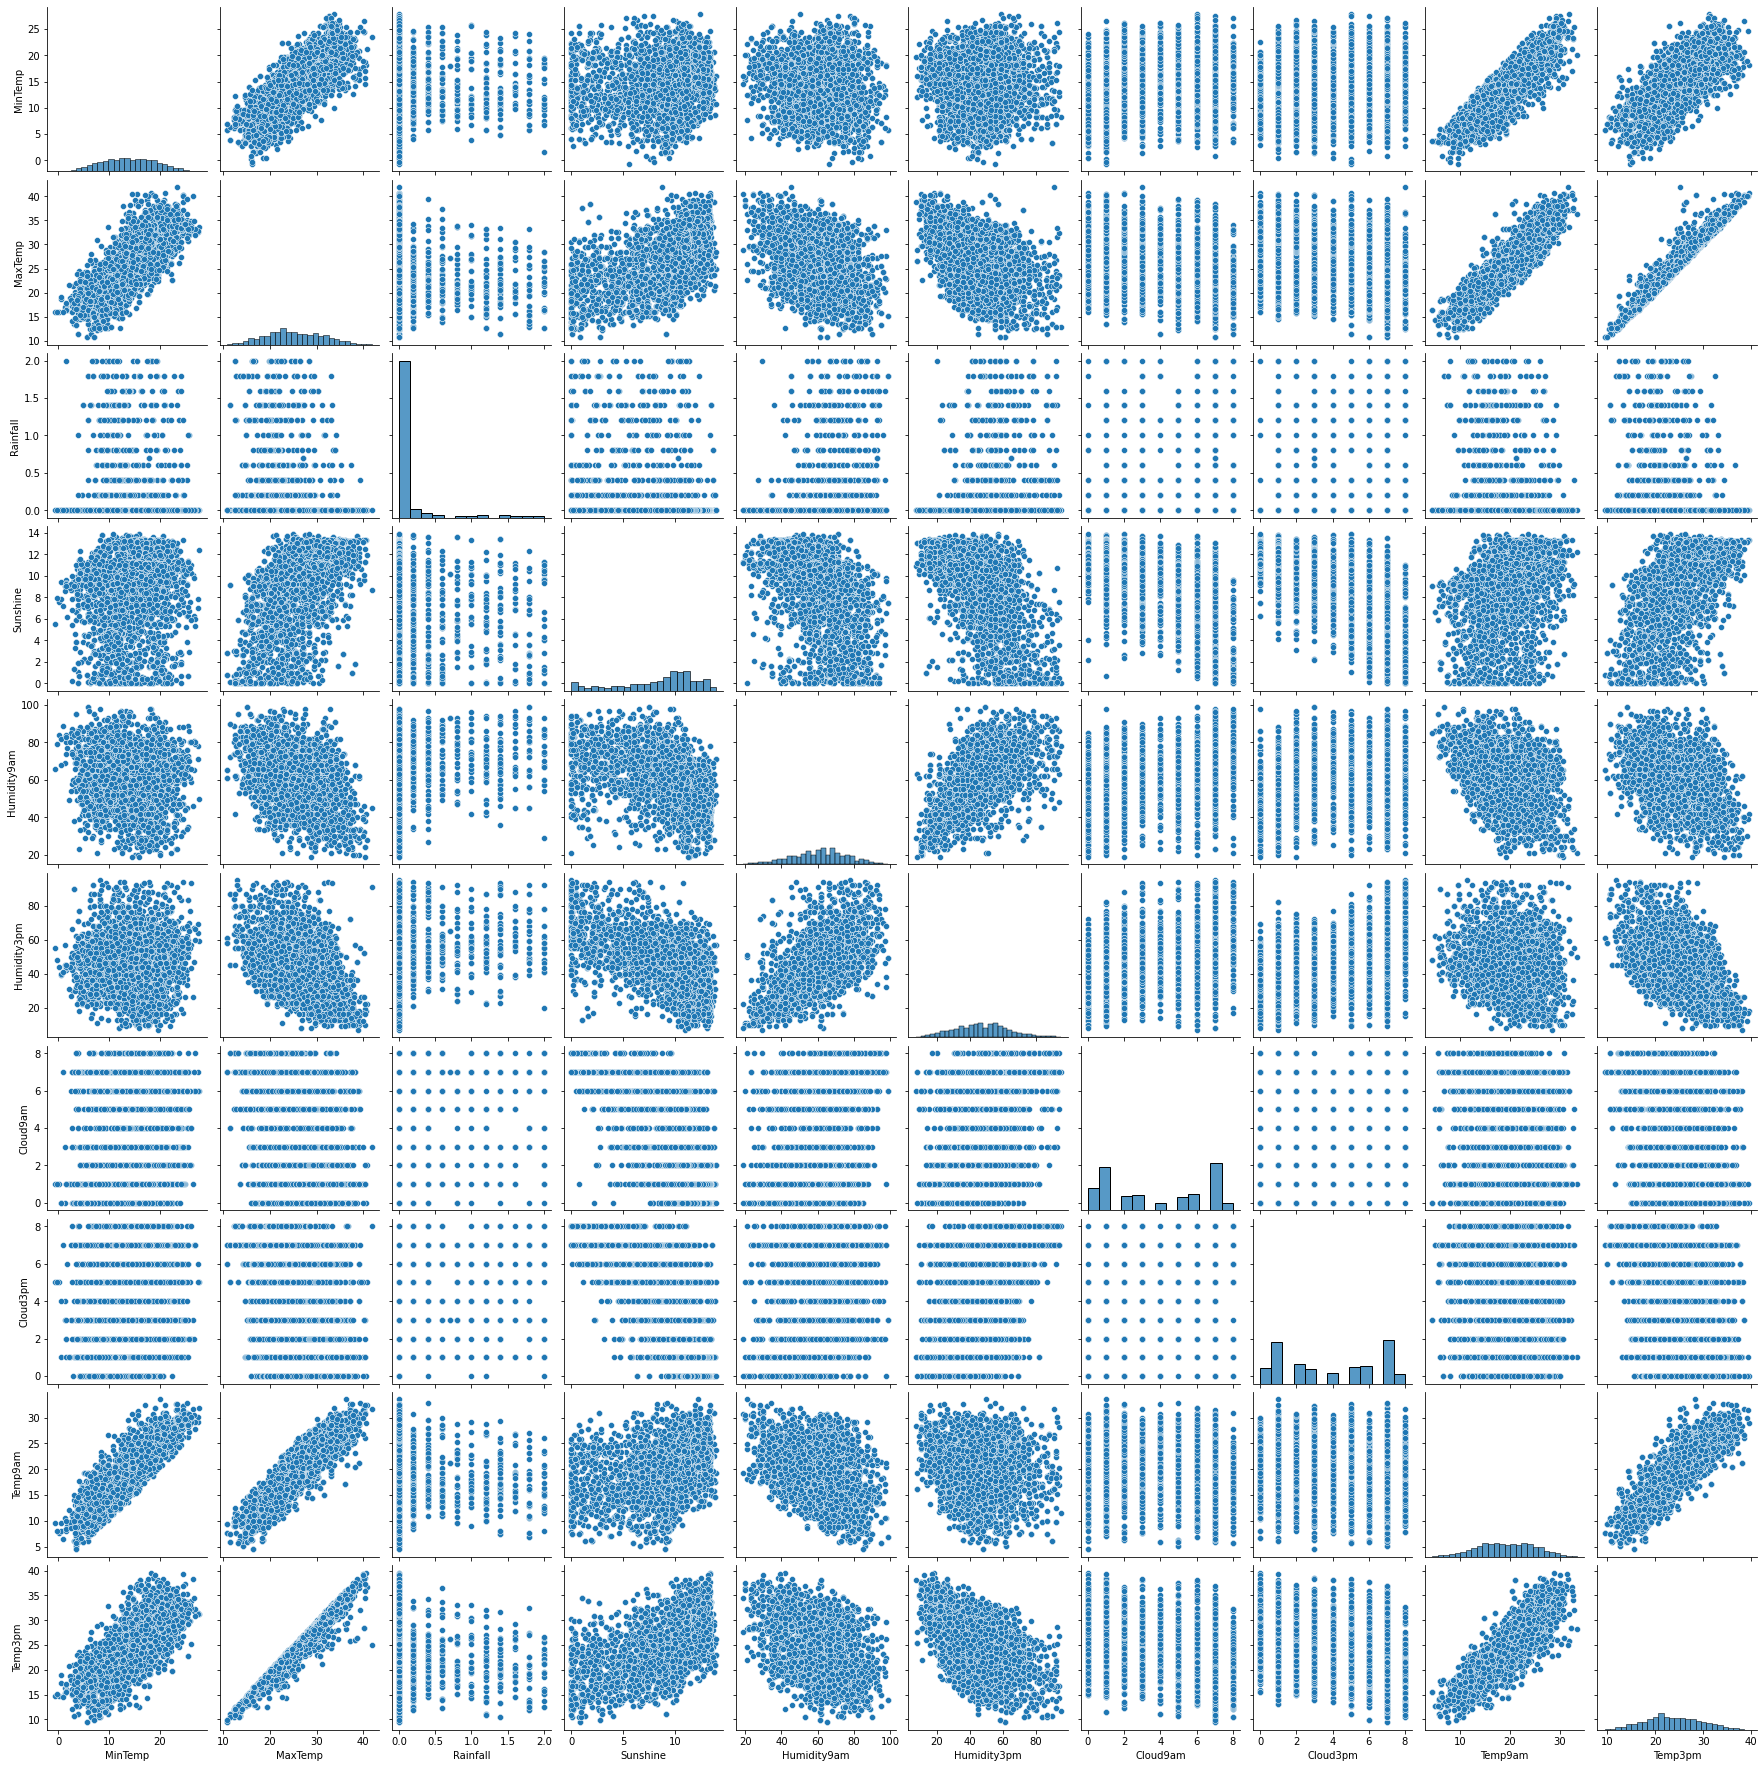

In [51]:
sns.pairplot(df_cleaned)

# Training Process Begin

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

Creating train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [54]:
x_train

,MinTemp,MaxTemp,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
1164,0.967021,1.624456,1.373907,0.325654,-0.322858,-0.956486,-1.080654,0.811694,1.354292
2626,0.022315,-0.450599,-1.668959,1.464849,0.747762,1.112636,1.113031,-0.493930,-0.269781
1938,-0.724723,-0.572095,0.299081,-0.287855,0.042490,-0.956486,0.174465,-0.638885,-0.697017
2813,0.003461,0.500841,1.484999,-1.444328,-0.762394,-1.580535,-1.685186,0.303750,0.447374
3117,1.437803,1.165441,0.202509,0.887957,-0.078240,0.849258,1.113031,1.338012,1.227734
...,...,...,...,...,...,...,...,...,...
2763,0.022315,0.915472,1.337143,-0.814412,-1.286679,-0.956486,-1.685186,0.466992,1.020048
905,0.820816,0.946926,-0.763237,0.395101,-0.078240,1.112636,1.113031,0.539552,1.020048
1096,0.340738,0.354700,0.496308,0.464795,-0.078240,1.112636,-1.080654,-0.058916,0.430700
235,0.985250,0.500841,1.264019,0.604906,1.089770,-0.956486,-1.080654,1.356165,0.580114


In [55]:
x_test

,MinTemp,MaxTemp,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
563,1.599317,0.436063,0.364223,0.187505,0.457612,1.112636,-1.080654,0.993158,0.530470
846,-0.569345,-1.666511,-1.838889,1.174651,1.810836,1.112636,1.113031,-1.399427,-1.540851
45,0.003461,-0.907827,-0.490191,2.279932,1.370131,0.565205,0.821030,-0.548291,-0.879355
394,-1.019578,-0.210889,0.563241,-1.006878,-1.490850,-0.956486,-0.192324,-0.294575,-0.252275
1749,1.653000,0.725453,-0.815649,-0.421233,1.370131,0.849258,1.113031,1.537707,0.447374
...,...,...,...,...,...,...,...,...,...
671,1.257493,2.130845,1.710747,-2.094216,0.042490,0.849258,-1.080654,2.100638,0.480666
2530,0.802493,1.118858,1.410804,-1.258924,-0.261291,0.254930,-0.602845,1.592175,0.744463
2483,-1.856162,-0.730007,0.941716,-0.749631,-0.698617,-0.484444,-1.080654,-0.747583,-0.553038
2660,-1.962335,-0.907827,0.107324,1.537930,-0.017749,-0.956486,-0.602845,-1.616557,-0.842670


In [56]:
y_train

5457    0.0
7733    0.0
6690    0.0
7975    0.0
8321    0.0
       ... 
7924    0.0
4947    0.0
5370    0.0
1215    0.0
5323    0.8
Name: Rainfall, Length: 2540, dtype: float64

In [57]:
y_test

3772    0.0
4834    0.0
987     1.4
1430    0.0
6429    0.6
       ... 
4616    0.0
7627    0.0
7573    0.0
7777    0.0
5776    0.0
Name: Rainfall, Length: 635, dtype: float64

In [58]:
x_train.shape

(2540, 9)

In [59]:
x_test.shape

(635, 9)

In [60]:
y_train.shape

(2540,)

In [61]:
y_test.shape

(635,)

In [62]:
lr=LinearRegression()

In [64]:
lr.fit(x_train,y_train)

LinearRegression()

In [65]:
coeff_df=pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
MinTemp,0.067696
MaxTemp,-0.073869
Sunshine,0.002355
Humidity9am,0.092181
Humidity3pm,-0.053385
Cloud9am,0.012892
Cloud3pm,0.004928
Temp9am,0.078794
Temp3pm,-0.105625


In [66]:
lr.intercept_

0.13058937511140406

To make predictions on test data

In [68]:
y_pred=lr.predict(x_test)

In [69]:
com_df=pd.DataFrame({'Actual Rainfall':y_test,'Predicted Rainfall':y_pred})
com_df

,Actual Rainfall,Predicted Rainfall
3772,0.0,0.231601
4834,0.0,0.294744
987,1.4,0.394763
1430,0.0,0.055403
6429,0.6,0.165350
...,...,...
4616,0.0,-0.012602
7627,0.0,0.050625
7573,0.0,0.017210
7777,0.0,0.154105


In [70]:
pd.set_option('display.max_rows',None)

In [71]:
com_df

,Actual Rainfall,Predicted Rainfall
3772,0.0,0.231601
4834,0.0,0.294744
987,1.4,0.394763
1430,0.0,0.055403
6429,0.6,0.165350
7050,0.0,-0.051932
7505,0.0,0.293329
6199,0.0,0.179266
8108,0.0,0.209292
7532,0.0,0.113257


In [72]:
com_df.shape

(635, 2)

In [73]:
print('error:')
print('Mean Absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean Squared error:',mean_squared_error(y_test,y_pred))
print('Root Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))

error:
Mean Absolute error: 0.20317263936132304
Mean Squared error: 0.11383656603282319
Root Squared error: 0.3373967486992475


In [74]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.00000,4002.000000,4002.000000
mean,13.981434,24.606172,2.998751,7.762194,64.103448,49.882309,4.149675,4.23913,18.867091,23.094003
std,5.181957,6.053266,12.169715,3.848099,16.437389,17.848186,2.782697,2.65241,5.519722,5.905529
min,-0.700000,10.800000,0.000000,0.000000,11.000000,6.000000,0.000000,0.00000,4.500000,9.400000
25%,10.100000,20.200000,0.000000,5.000000,53.000000,38.000000,1.000000,1.00000,14.800000,18.900000
50%,13.900000,23.900000,0.000000,8.800000,64.000000,49.000000,5.000000,5.00000,18.600000,22.500000
75%,17.800000,29.000000,0.800000,10.800000,76.000000,61.000000,7.000000,7.00000,23.100000,27.200000
max,28.500000,43.600000,371.000000,13.900000,99.000000,98.000000,8.000000,8.00000,39.400000,42.400000


2. Random Forest Regressor

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rf=RandomForestRegressor()

In [77]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [78]:
y_pred=rf.predict(x_test)

In [81]:
com_df=pd.DataFrame({'Actual Rainfall':y_test,'Predicted Rainfall':y_pred})
com_df

,Actual Rainfall,Predicted Rainfall
3772,0.0,0.104
4834,0.0,0.174
987,1.4,0.852
1430,0.0,0.034
6429,0.6,0.022
7050,0.0,0.000
7505,0.0,0.362
6199,0.0,0.258
8108,0.0,0.604
7532,0.0,0.010


In [82]:
print('error:')
print('Mean Absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean Squared error:',mean_squared_error(y_test,y_pred))
print('Root Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))

error:
Mean Absolute error: 0.16171968503937006
Mean Squared error: 0.09066740787401575
Root Squared error: 0.3011102918766075


3. Decision Tree Regressor

In [83]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1,random_state=1)

In [84]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=1)

In [85]:
y_pred3=dt.predict(x_test)

In [86]:
print('error:')
print('Mean Absolute error:',mean_absolute_error(y_test,y_pred3))
print('Mean Squared error:',mean_squared_error(y_test,y_pred3))
print('Root Squared error:',np.sqrt(mean_squared_error(y_test,y_pred3)))

error:
Mean Absolute error: 0.18626838505563578
Mean Squared error: 0.11590712097067761
Root Squared error: 0.34045134890418277


Amomg these models RandomForest has lowest Root mean square value. Therefore lower the root mean square
higher will be the accuracy of the predicted model